In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
def bootstrap_std_dev(df):
    bootstrapped = df.sample(n=len(df), replace=True) #sample with replacement
    return bootstrapped.std()

def bootstrap_mean(df):
    bootstrapped = df.sample(n=len(df), replace=True) #sample with replacement
    return bootstrapped.mean()

def reject_outliers(data, m = 30.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else np.zeros(len(d))
    # print(s)
    return data[s<m]

c='0123'

suffix=''
# suffix2='_params_d900_n100' #_params_397_n100_region_eval
suffix3='_params_d100_n150_a001_new_mse_trial_std'
suffix4='_params_d100_n300_a001_new_mse_trial_std'
folder="parquets/concept_experiments/kmeans" 
folder2="parquets/concept_experiments/optimised_mse"
folder3="parquets/concept_experiments/optimised_stochastic"

df = pd.read_parquet(f"{folder}/ope_estimates_c{c}_eps02{suffix}")
df_05 = pd.read_parquet(f"{folder}/ope_estimates_c{c}_eps05{suffix}")
df_opt_02 = pd.read_parquet(f"{folder3}/ope_estimates_c{c}_eps02{suffix3}")
df_opt_05 = pd.read_parquet(f"{folder3}/ope_estimates_c{c}_eps05{suffix4}")


# ---REJECT OUTLIERS---
for d in [100, 300, 500, 700, 900]:
    df_opt_02[f"{d}_concepts"] = reject_outliers(df_opt_02[f"{d}_concepts"], m=10)
    df_opt_05[f"{d}_concepts"] = reject_outliers(df_opt_05[f"{d}_concepts"], m=15)
    df[f"{d}_concepts"] = reject_outliers(df[f"{d}_concepts"], m=30)
    df_05[f"{d}_concepts"] = reject_outliers(df_05[f"{d}_concepts"])
    df[f"{d}_vanilla"] = reject_outliers(df[f"{d}_vanilla"], m=30)
    df_05[f"{d}_vanilla"] = reject_outliers(df_05[f"{d}_vanilla"])



#---BOOTSTRAP SAMPLING---
df_bootstrapped_std = pd.concat([bootstrap_std_dev(df) for i in range (1000)], axis=1).T.describe()
df_05_bootstrapped_std = pd.concat([bootstrap_std_dev(df_05) for i in range (1000)], axis=1).T.describe()
df_opt_02_bootstrapped_std = pd.concat([bootstrap_std_dev(df_opt_02) for i in range (1000)], axis=1).T.describe()
df_opt_05_bootstrapped_std = pd.concat([bootstrap_std_dev(df_opt_05) for i in range (1000)], axis=1).T.describe()

df_bootstrapped_mean = pd.concat([bootstrap_mean(df) for i in range (1000)], axis=1).T.describe()
df_05_bootstrapped_mean= pd.concat([bootstrap_mean(df_05) for i in range (1000)], axis=1).T.describe()
df_opt_02_bootstrapped_mean = pd.concat([bootstrap_mean(df_opt_02) for i in range (1000)], axis=1).T.describe()
df_opt_05_bootstrapped_mean = pd.concat([bootstrap_mean(df_opt_05) for i in range (1000)], axis=1).T.describe()

on_policy_02 = -423
on_policy_05 = -347 # -339 -227 -477


df_stats = df.describe()
df_05_stats = df_05.describe()
df_stats_opt_02 = df_opt_02.describe()
df_stats_opt_05 = df_opt_05.describe()

print(df_stats)
print(df_stats_opt_02)
# print(df_bootstrapped_std)
# print(df_bootstrapped_std.loc["std"].filter(like="vanilla"))

x = np.array([100, 300, 500, 700, 900])

       100_vanilla  100_concepts  300_vanilla  300_concepts  500_vanilla  \
count   100.000000    100.000000   100.000000    100.000000   100.000000   
mean   -420.137142   -370.878101  -401.506241   -419.532273  -398.041028   
std     498.856054    175.840664   143.962376    117.805428   118.249731   
min   -5120.110915  -1442.874586 -1257.826755   -808.828924  -993.890955   
25%    -427.095238   -420.181587  -427.188545   -468.723329  -423.274389   
50%    -329.045055   -331.918550  -370.976634   -390.657530  -374.700892   
75%    -280.109823   -282.072707  -329.082700   -342.291311  -326.680294   
max    -145.159399   -172.223500  -255.224715   -245.213466  -240.642870   

       500_concepts  700_vanilla  700_concepts  900_vanilla  900_concepts  
count    100.000000   100.000000    100.000000   100.000000    100.000000  
mean    -386.918637  -467.526302   -394.481489  -398.742129   -388.998289  
std       90.832444   444.428323     84.392515   117.575501     82.106637  
min     -79

In [50]:
colors_light = ["mediumturquoise", "orangered","limegreen", "palevioletred", "violet",  "orangered", "plum","lightsteelblue", "greenyellow", "violet"]
colors_dark = ["dodgerblue" , "gold", "forestgreen", "red", "darkviolet", "gold", "blueviolet" , "darkslategrey", "olive", "darkviolet"]

concepts_color =  "saddlebrown" #colors_dark[8] # "saddlebrown" #"limegreen" mediumturquoise orangered violet palevioletred
concepts_color_opt_02 = colors_dark[4] #"forestgreen" dodgerblue gold darkviolet red
vanilla_color = "lightsalmon" # colors_light[8]# "lightsalmon"
vanilla_color_opt_02 =  colors_light[4]

kmeans_comparison = True

if kmeans_comparison:
    pdis_label=r'CPDIS kmeans $\epsilon$=0.2'
    cpdis_label=r'CPDIS kmeans $\epsilon$=0.5'
    pdis_label_2=r'CPDIS Opt $\epsilon$=0.2'
    cpdis_label_2=r'CPDIS Opt $\epsilon$=0.5'
else:
    pdis_label=r'PDIS $\epsilon$=0.2'
    cpdis_label=r'CPDIS $\epsilon$=0.2'
    pdis_label_2=r'PDIS $\epsilon$=0.5'
    cpdis_label_2=r'CPDIS $\epsilon$=0.5'

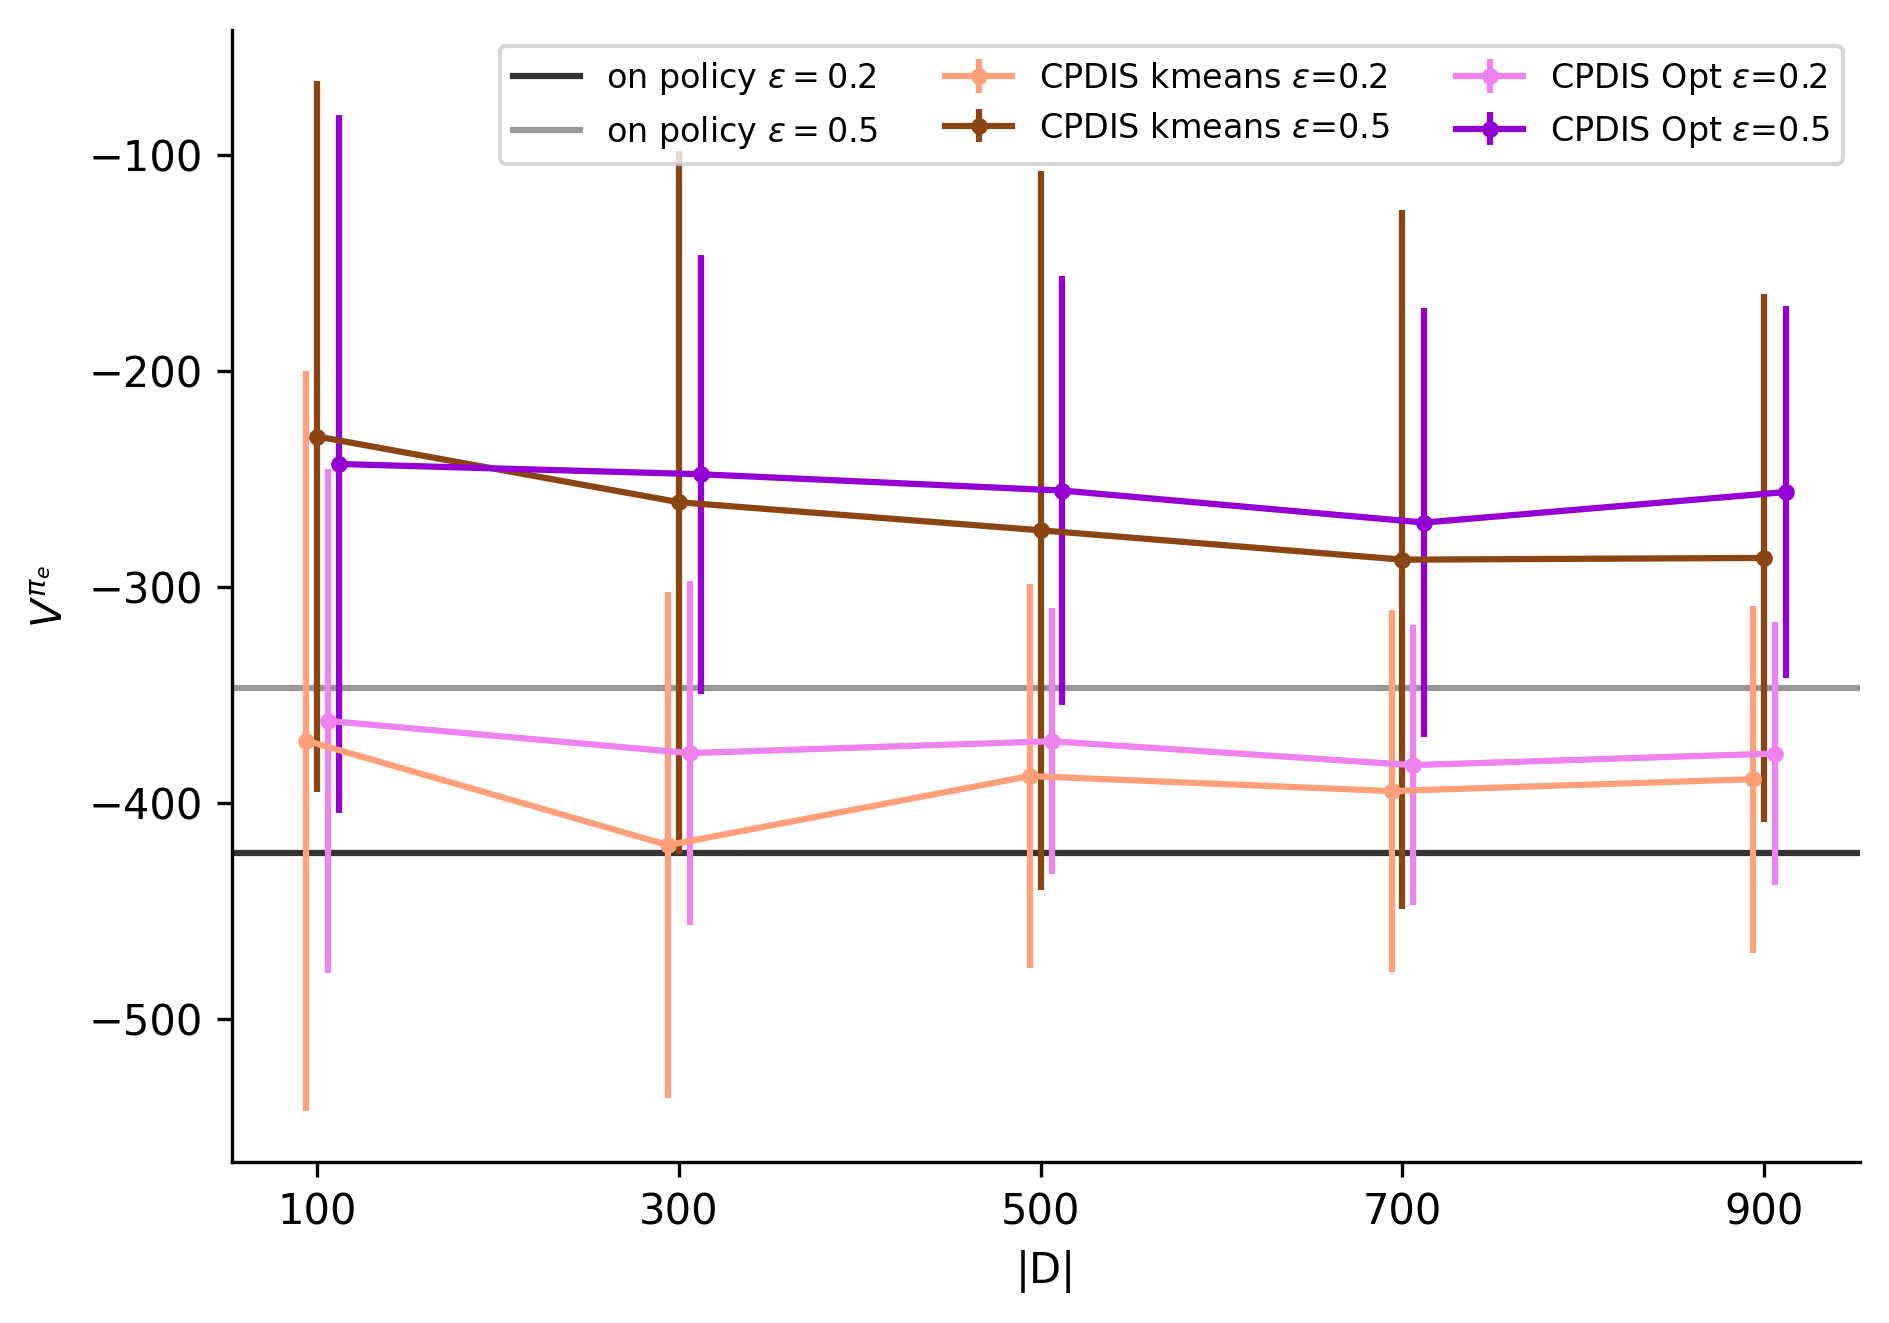

In [55]:
mean_estimates_vanilla = df_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts = df_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla = df_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts = df_bootstrapped_std.loc["mean"].filter(like="concepts")


mean_estimates_vanilla_opt_02 = df_opt_02_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts_opt_02 = df_opt_02_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla_opt_02 = df_opt_02_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts_opt_02 = df_opt_02_bootstrapped_std.loc["mean"].filter(like="concepts")

mean_estimates_vanilla_05 = df_05_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts_05 = df_05_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla_05 = df_05_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts_05 = df_05_bootstrapped_std.loc["mean"].filter(like="concepts")

mean_estimates_vanilla_opt_05 = df_opt_05_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts_opt_05 = df_opt_05_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla_opt_05 = df_opt_05_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts_opt_05 = df_opt_05_bootstrapped_std.loc["mean"].filter(like="concepts")

#Windy, express, more concepts
indicative_rewards = [(-251,-406),(-170,-275),(-366,-554)]

a_high_reward, a_low_reward = indicative_rewards[2]

fig = plt.figure(figsize=(7,5), dpi=300)
# plt.subplot(1,2,1)

plt.errorbar(x-6, mean_estimates_concepts.to_list() , yerr=std_concepts.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, mean_estimates_concepts_05.to_list() , yerr=std_concepts_05.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x+6, mean_estimates_concepts_opt_02.to_list() , yerr=std_concepts_opt_02.to_list(), label=pdis_label_2, color=vanilla_color_opt_02, marker=".")
plt.errorbar(x+12, mean_estimates_concepts_opt_05.to_list() , yerr=std_concepts_opt_05.to_list(), label=cpdis_label_2, color=concepts_color_opt_02, marker=".")
plt.axhline(on_policy_02, label=r"on policy $\epsilon=0.2$", color="black", alpha=0.8, zorder=-1)
plt.axhline(on_policy_05, label=r"on policy $\epsilon=0.5$", color="grey", alpha=0.8, zorder=-1)
# plt.axhline(a_high_reward, label="high reward", color="seagreen", alpha=0.5, linestyle="--", linewidth=0.7)
# plt.axhline(a_low_reward, label="low reward", color="maroon", alpha=0.5, linestyle="--", linewidth=0.7)
plt.legend(loc="upper right", ncols=3, fontsize=8, bbox_to_anchor=(1.1, 1.1) )#
plt.ylabel(r"$V^{\pi_e}$")
plt.xlabel("|D|")
plt.xticks(x)

# for pos in ['right', 'top']:
#     plt.gca().spines[pos].set_visible(False)

plt.show()


## Bias Plots

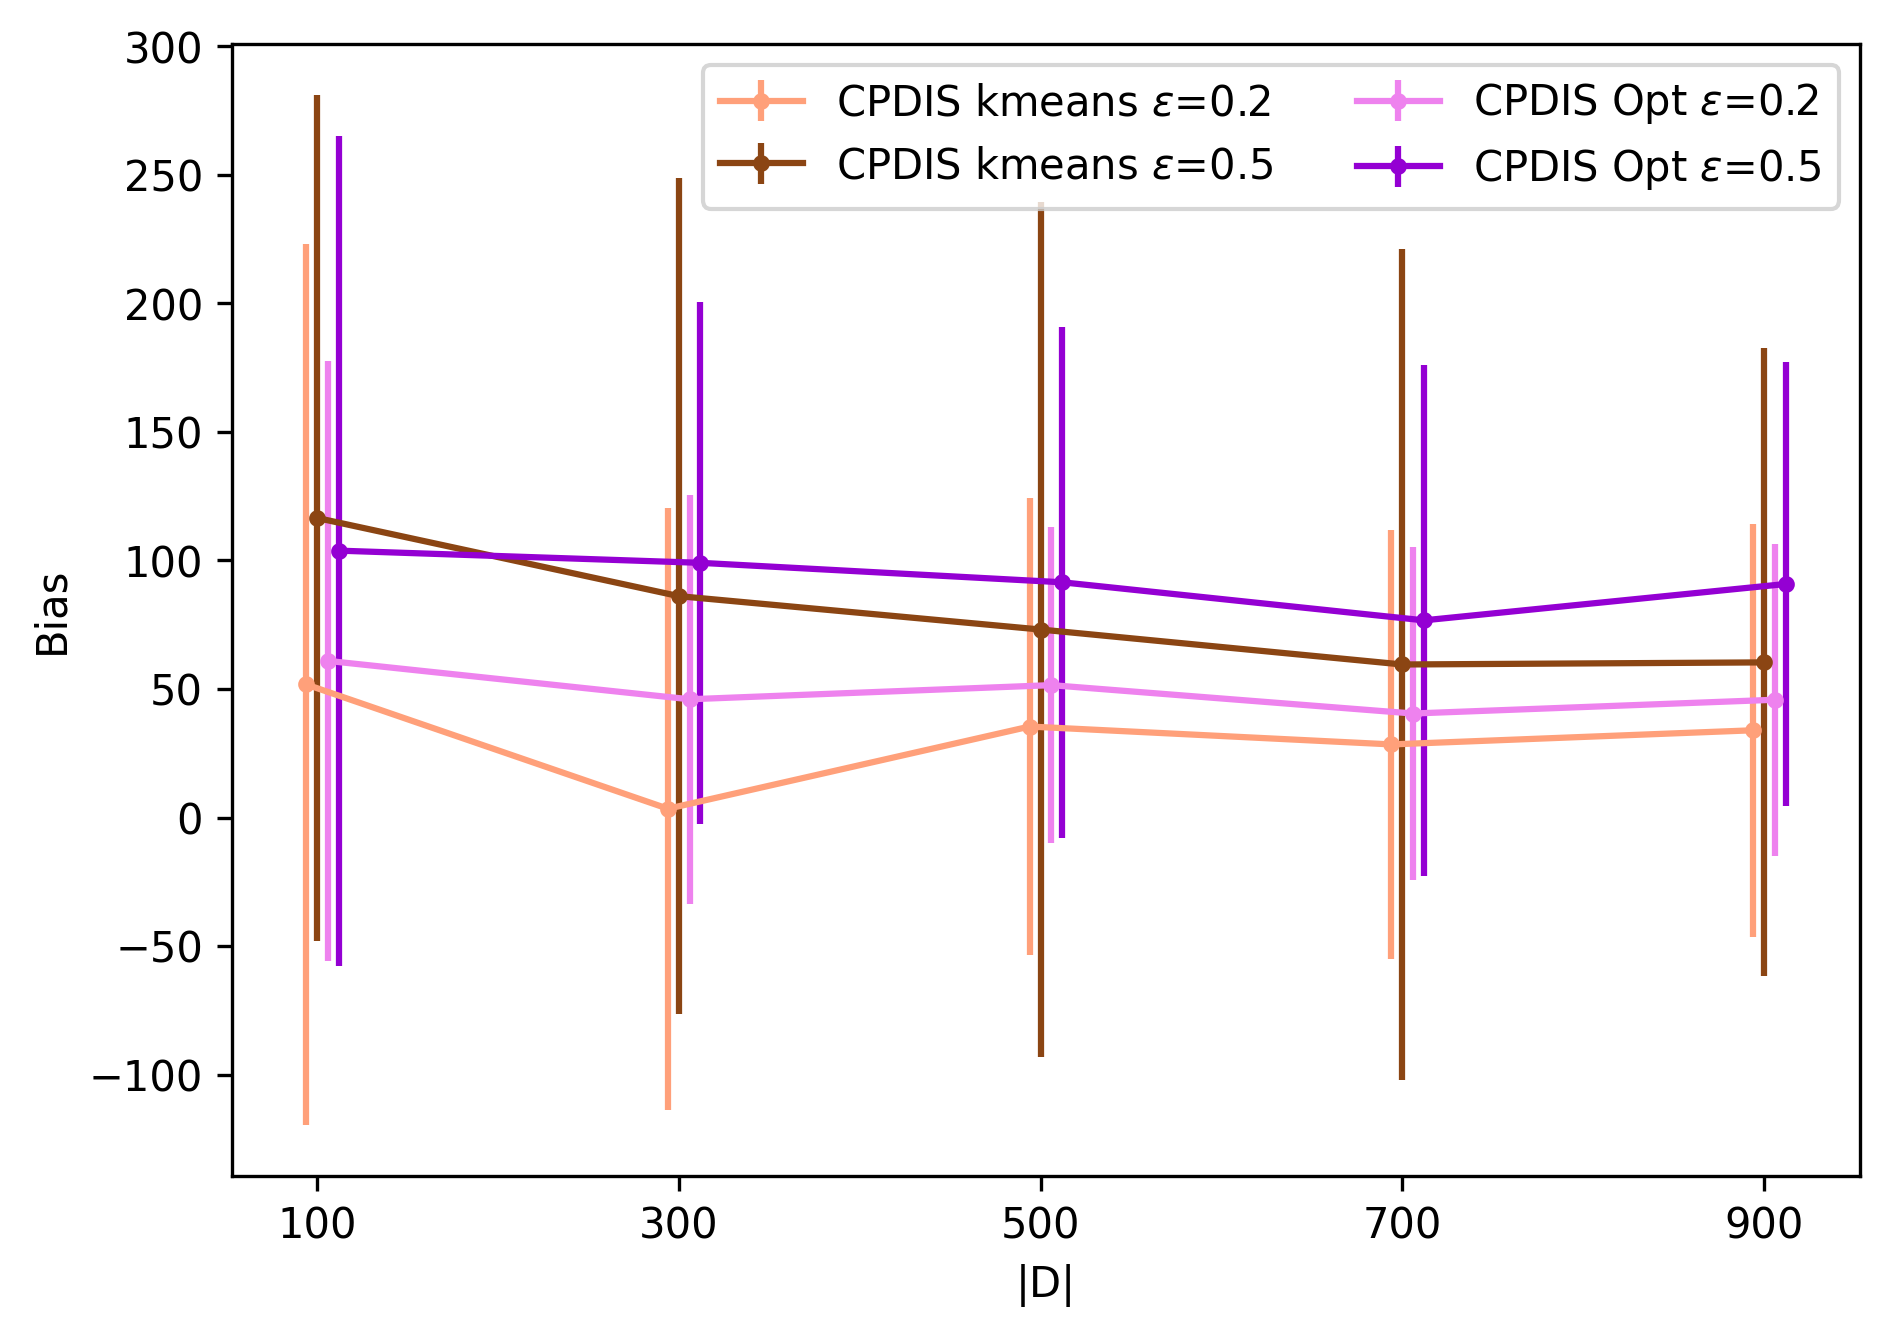

In [52]:

bias_vanilla = mean_estimates_vanilla - on_policy_02
bias_concepts = mean_estimates_concepts - on_policy_02
bias_vanilla_05 = mean_estimates_vanilla_05 - on_policy_05
bias_concepts_05 = mean_estimates_concepts_05 - on_policy_05

bias_vanilla_opt_02 = mean_estimates_vanilla_opt_02 - on_policy_02
bias_concepts_opt_02 = mean_estimates_concepts_opt_02 - on_policy_02
bias_vanilla_opt_05 = mean_estimates_vanilla_opt_05 - on_policy_05
bias_concepts_opt_05 = mean_estimates_concepts_opt_05 - on_policy_05



fig = plt.figure(figsize=(7,5), dpi=300)
# plt.subplot(1,2,1)
plt.errorbar(x-6, bias_concepts, label=pdis_label, yerr=std_concepts.to_list(), color=vanilla_color, marker=".")
plt.errorbar(x, bias_concepts_05, label=cpdis_label, yerr=std_concepts_05.to_list(), color=concepts_color, marker=".")
plt.errorbar(x+6, bias_concepts_opt_02, label=pdis_label_2, yerr=std_concepts_opt_02.to_list(), color=vanilla_color_opt_02, marker=".")
plt.errorbar(x+12, bias_concepts_opt_05, label=cpdis_label_2, yerr=std_concepts_opt_05.to_list(), color=concepts_color_opt_02, marker=".")
plt.xlabel("|D|")
plt.ylabel("Bias") 
plt.xticks(x)
plt.legend(loc="upper right",ncols=2)
plt.show()

# fig = plt.figure(figsize=(7,5), dpi=300)
# # plt.subplot(1,2,2)
# plt.errorbar(x-6, bias_vanilla_05, yerr=std_vanilla_05.to_list(), label=pdis_label, color=vanilla_color, marker=".")
# plt.errorbar(x, bias_concepts_05, yerr=std_concepts_05.to_list(), label=cpdis_label, color=concepts_color, marker=".")
# plt.errorbar(x+6, bias_vanilla_opt_05, yerr=std_vanilla_opt_05.to_list(), label=pdis_label_2, color=vanilla_color_opt_02, marker=".")
# plt.errorbar(x+12, bias_concepts_opt_05, yerr=std_concepts_opt_05.to_list(), label=cpdis_label_2, color=concepts_color_opt_02, marker=".")
# plt.ylabel("Bias")
# plt.xlabel("|D|")
# plt.xticks(x)

# plt.legend(loc="lower center")
# plt.show()


## Variance Plots

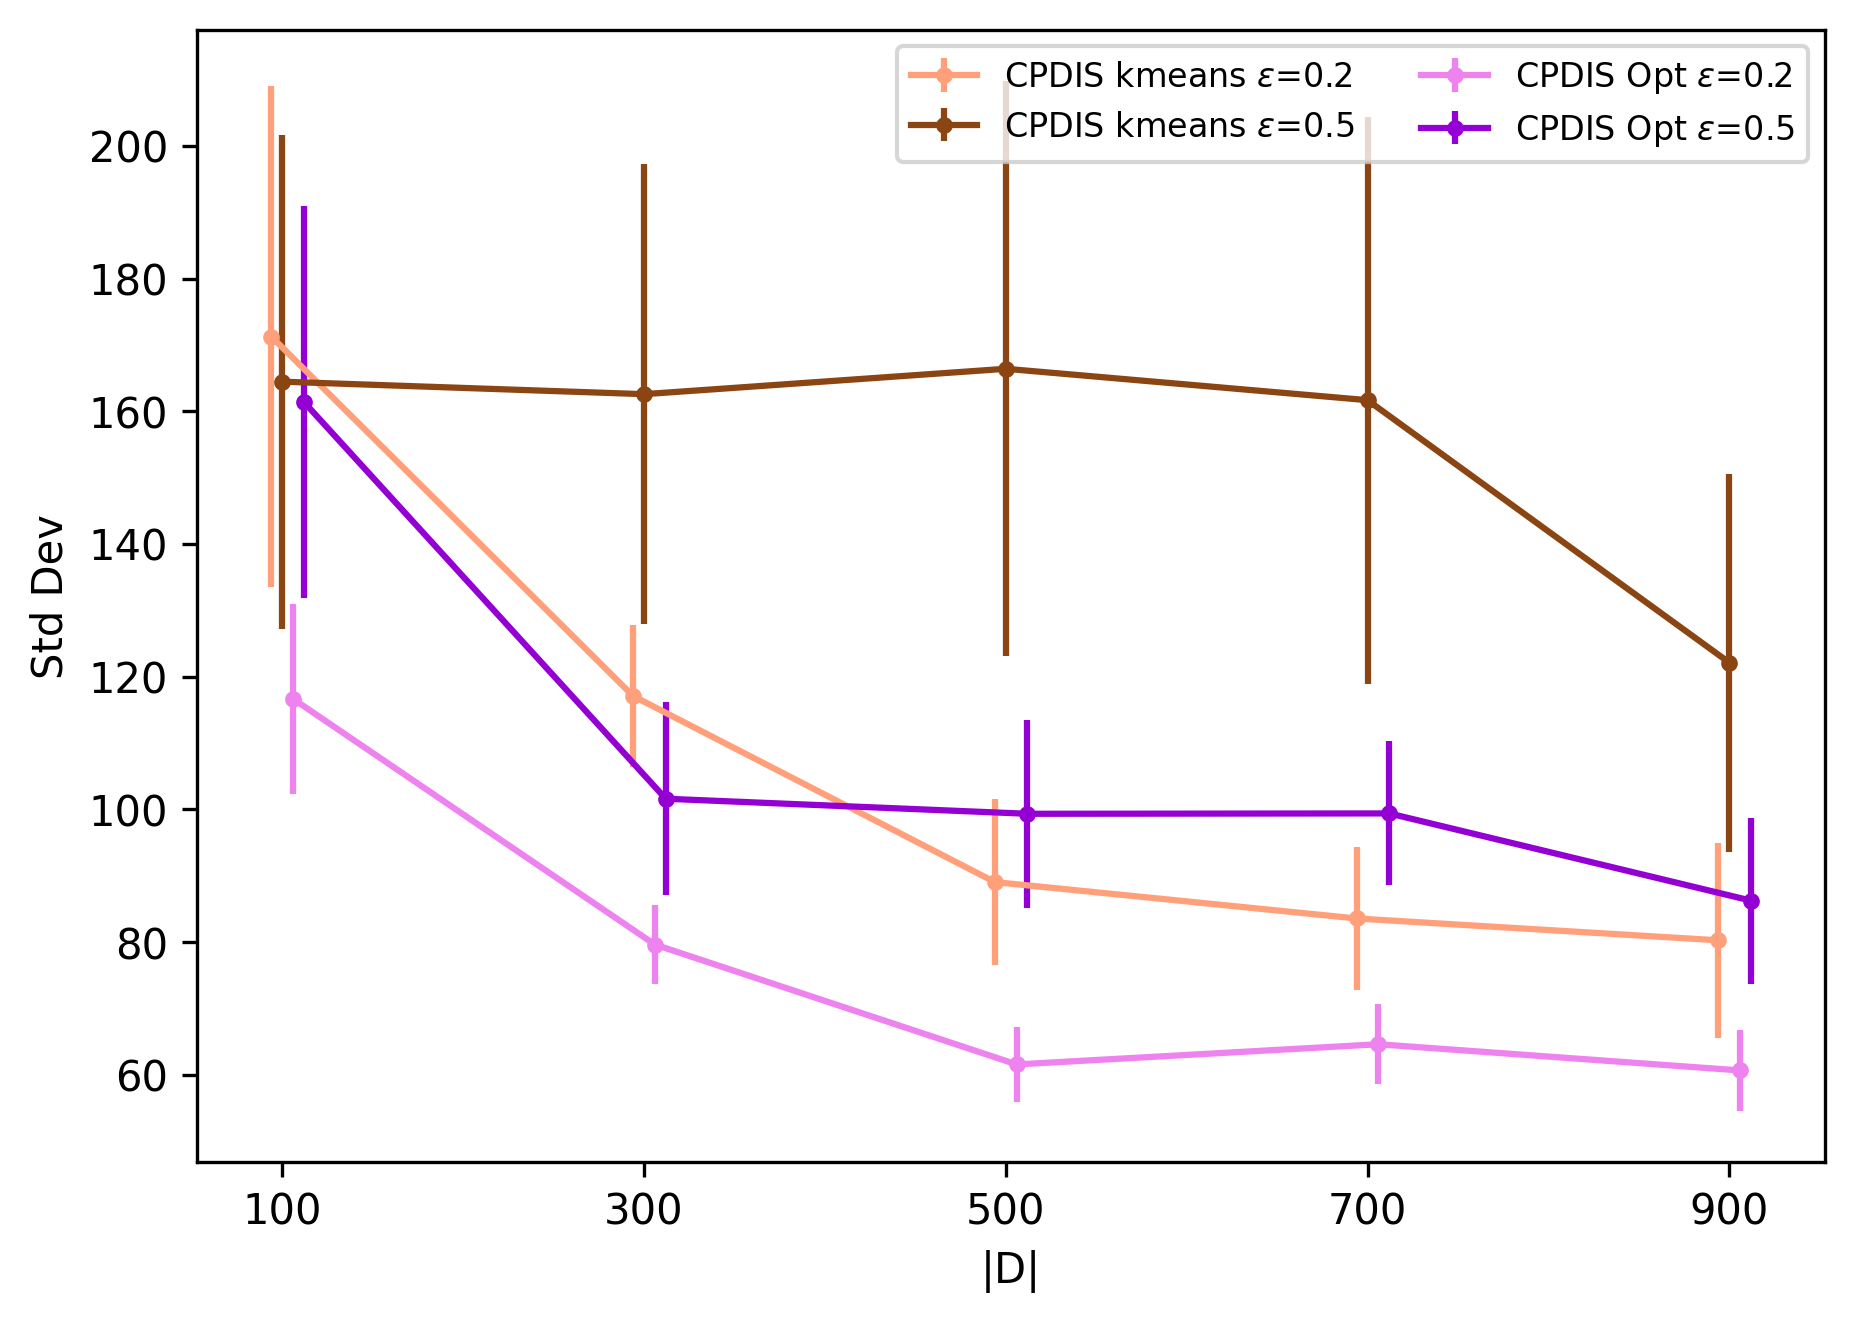

In [53]:
var_vanilla = std_vanilla**2
var_concepts = std_concepts**2
var_vanilla_05 = std_vanilla_05**2
var_concepts_05 = std_concepts_05**2
var_vanilla_opt_02 = std_vanilla_opt_02**2
var_concepts_opt_02 = std_concepts_opt_02**2
var_vanilla_opt_05 = std_vanilla_opt_05**2
var_concepts_opt_05 = std_concepts_opt_05**2

#Error bars of standard deviation from bootstrap sampling
err_vanilla = df_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts = df_bootstrapped_std.loc["std"].filter(like="concepts")
err_vanilla_05 = df_05_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts_05 = df_05_bootstrapped_std.loc["std"].filter(like="concepts")
err_vanilla_opt_02 = df_opt_02_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts_opt_02 = df_opt_02_bootstrapped_std.loc["std"].filter(like="concepts")
err_vanilla_opt_05 = df_opt_05_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts_opt_05 = df_opt_05_bootstrapped_std.loc["std"].filter(like="concepts")


fig = plt.figure(figsize=(7,5), dpi=300)
plt.errorbar(x-6, std_concepts, yerr=err_concepts.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, std_concepts_05, yerr=err_concepts_05.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x+6, std_concepts_opt_02, yerr=err_concepts_opt_02.to_list(), label=pdis_label_2, color=vanilla_color_opt_02,  marker=".")
plt.errorbar(x+12, std_concepts_opt_05, yerr=err_concepts_opt_05.to_list(), label=cpdis_label_2, color=concepts_color_opt_02,  marker=".")
plt.xlabel("|D|")
plt.ylabel("Std Dev")
plt.legend(loc="upper right",ncols=2, fontsize=8)
plt.xticks(x)
plt.show()


## MSE Plots

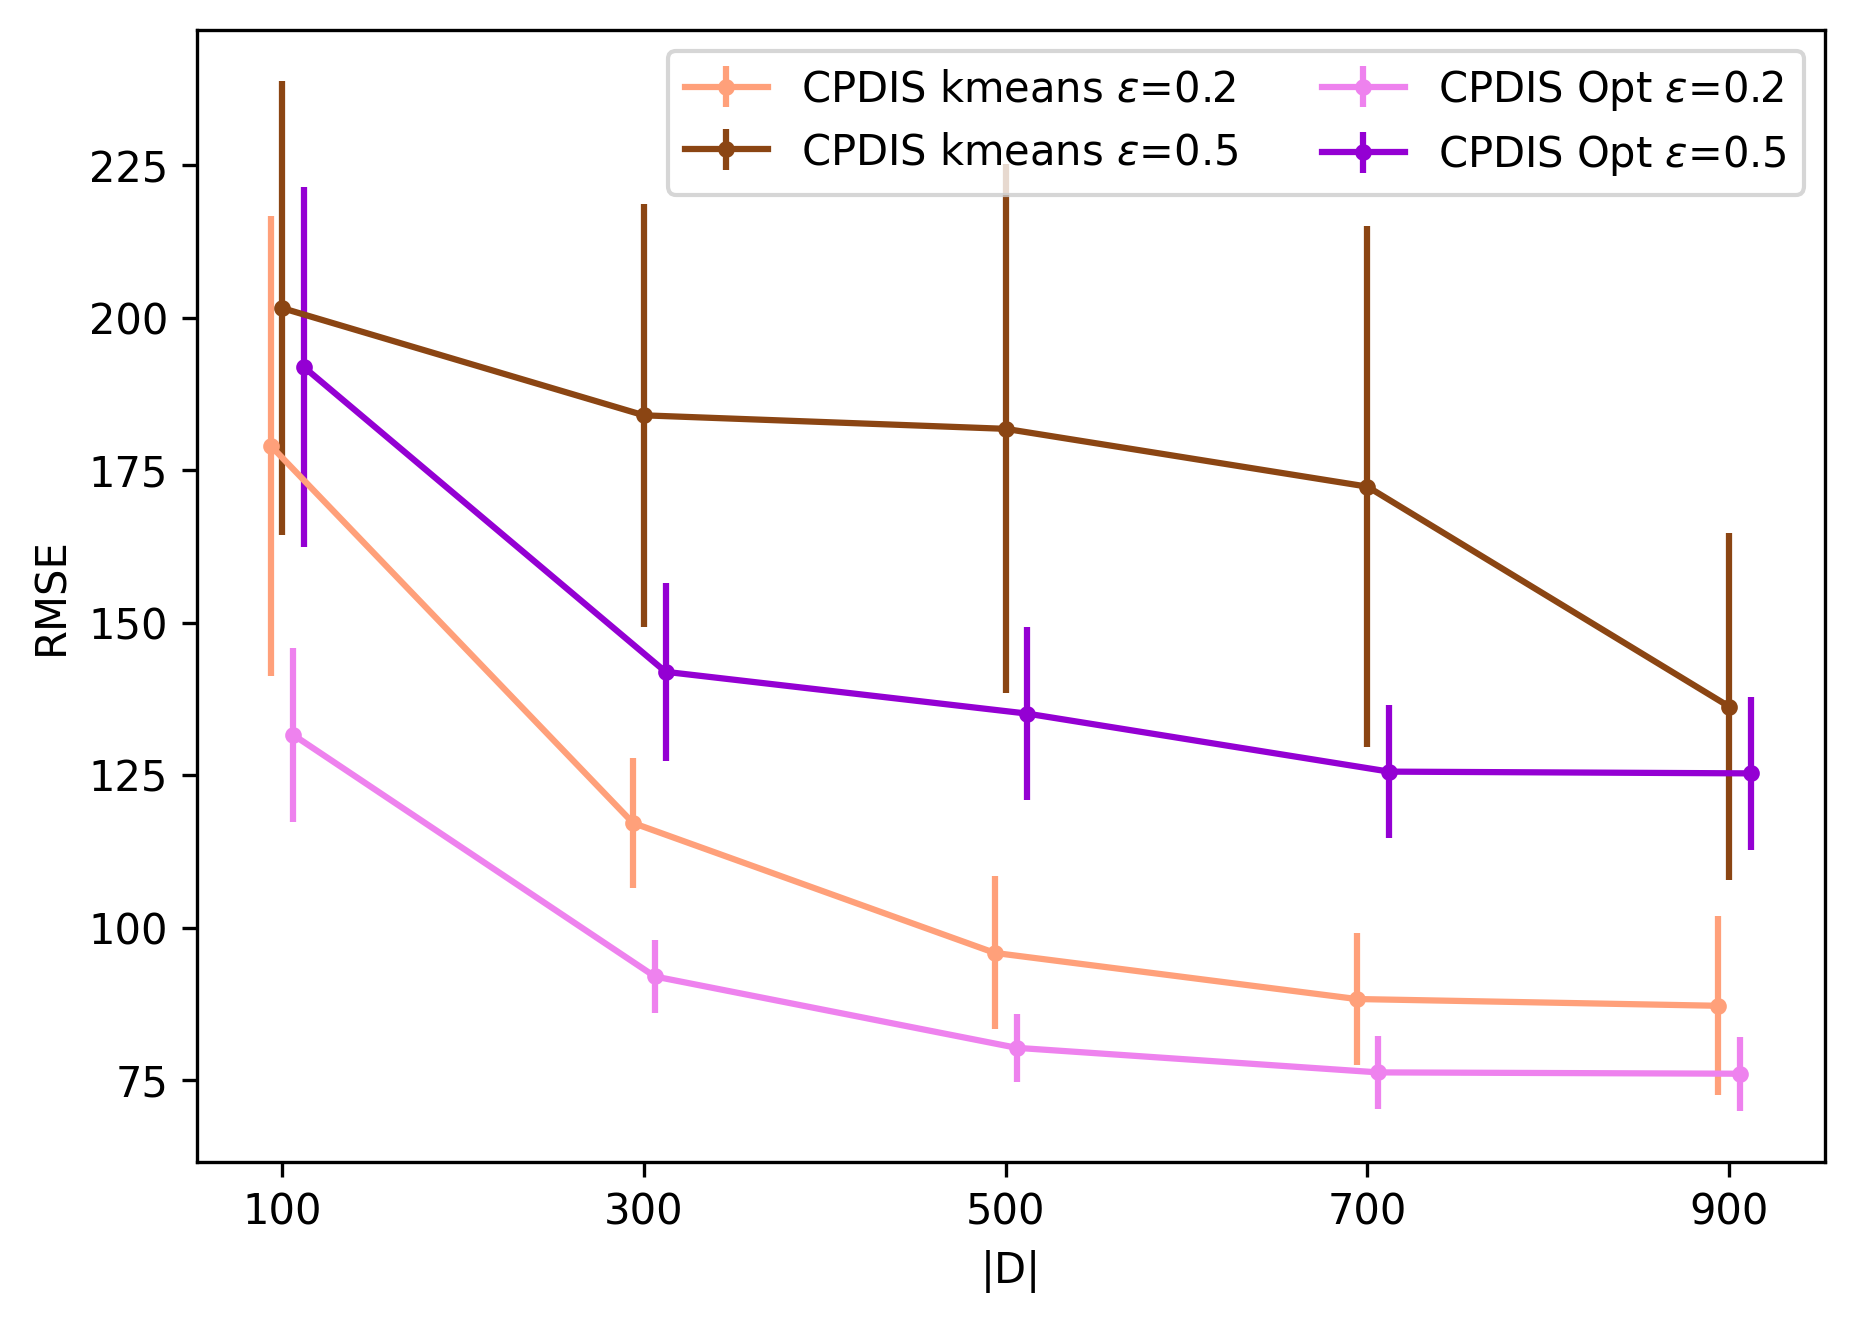

In [54]:
mse_vanilla = np.sqrt(var_vanilla + bias_vanilla**2)
mse_concepts = np.sqrt(var_concepts + bias_concepts**2)
mse_vanilla_05 =np.sqrt(var_vanilla_05 + bias_vanilla_05**2)
mse_concepts_05 = np.sqrt(var_concepts_05 + bias_concepts_05**2)

mse_vanilla_opt_02 = np.sqrt(var_vanilla_opt_02 + bias_vanilla_opt_02**2)
mse_concepts_opt_02 = np.sqrt(var_concepts_opt_02 + bias_concepts_opt_02**2)
mse_vanilla_opt_05 = np.sqrt(var_vanilla_opt_05 + bias_vanilla_opt_05**2)
mse_concepts_opt_05 = np.sqrt(var_concepts_opt_05 + bias_concepts_opt_05**2)

fig = plt.figure(figsize=(7,5), dpi=300)

plt.errorbar(x-6, mse_concepts, yerr=err_concepts.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, mse_concepts_05, yerr=err_concepts_05.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x+6, mse_concepts_opt_02, yerr=err_concepts_opt_02.to_list(), label=pdis_label_2, color=vanilla_color_opt_02, marker=".")
plt.errorbar(x+12, mse_concepts_opt_05, yerr=err_concepts_opt_05.to_list(), label=cpdis_label_2, color=concepts_color_opt_02, marker=".")
plt.xlabel("|D|")
plt.ylabel("RMSE")
plt.xticks(x)
plt.legend(ncols=2)
plt.show()

# fig = plt.figure(figsize=(7,5), dpi=300)
# plt.plot(x, mse_vanilla_05, label=pdis_label, color=vanilla_color, marker=".")
# plt.plot(x, mse_concepts_05, label=cpdis_label, color=concepts_color, marker=".")
# plt.plot(x, mse_vanilla_opt_05, label=pdis_label_2, color=vanilla_color_opt_02, marker=".")
# plt.plot(x, mse_concepts_opt_05, label=cpdis_label_2, color=concepts_color_opt_02, marker=".")
# plt.xlabel("|D|")
# plt.ylabel("RMSE")
# plt.xticks(x)


# plt.legend(loc="center right")
# plt.show()